In [439]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [440]:
sns.set_theme()
pd.set_option('display.max_columns', None)
PATH_TO_MBD = './MBD/'

In [441]:
targets = pd.read_parquet(path=os.path.join(PATH_TO_MBD, 'targets/fold=0'))

In [442]:
print(targets.shape)
targets.head()

(243936, 8)


,client_id,mon,target_1,target_2,target_3,target_4,trans_count,diff_trans_date
0,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2022-02-28,0,0,0,0,10,0.0
1,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2022-03-31,0,0,0,0,29,0.0
2,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2022-04-30,0,0,0,0,51,0.0
3,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2022-05-31,0,0,0,0,52,4.0
4,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2022-06-30,0,0,0,0,52,35.0


In [443]:
# targets['mon'] = (pd.to_datetime(targets['mon']).dt.month + 10) % 12 + 1
targets['mon'] = pd.to_datetime(targets['mon'])

In [444]:
targets.isna().sum(axis=0)

client_id              0
mon                    0
target_1               0
target_2               0
target_3               0
target_4               0
trans_count            0
diff_trans_date    24042
dtype: int64

In [445]:
targets[targets['diff_trans_date'].isna()].head()

,client_id,mon,target_1,target_2,target_3,target_4,trans_count,diff_trans_date
12,02377be0f35d0ea60b531b317d0bf166b69f74ca38dcd5...,2022-02-28,0,0,0,0,0,NaN
13,02377be0f35d0ea60b531b317d0bf166b69f74ca38dcd5...,2022-03-31,0,0,0,0,0,NaN
14,02377be0f35d0ea60b531b317d0bf166b69f74ca38dcd5...,2022-04-30,0,0,0,0,0,NaN
24,048a83de1385297487292d860ea9bd16538c85ad93b72a...,2022-02-28,0,0,0,0,0,NaN
36,0af35089e0209afc40991bebc9938f045cf2b549a0c49d...,2022-02-28,0,0,0,0,0,NaN


In [446]:
targets[targets['diff_trans_date'].isna() | (targets['trans_count'] == 0)].size - targets[targets['diff_trans_date'].isna() & (targets['trans_count'] == 0)].size

0

Notice that `diff_trans_date` is `NA` if and only if `trans_count` is 0 which makes sense: there is no such a thing as time since the last transaction when it is your first transaction.

In [447]:
targets.fillna(value=np.inf, inplace=True)

In [448]:
targets['diff_trans_date'].describe()

d:\SberIndex\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    243936.0
mean          inf
std           NaN
min           0.0
25%           0.0
50%           4.0
75%          24.0
max           inf
Name: diff_trans_date, dtype: float64

In [449]:
targets.dtypes

client_id                  object
mon                datetime64[ns]
target_1                    int32
target_2                    int32
target_3                    int32
target_4                    int32
trans_count                 int32
diff_trans_date           float64
dtype: object

In [450]:
# targets = \
# targets.astype(
#     {
#         # 'target_1' : 'bool', 
#         # 'target_2' : 'bool', 
#         # 'target_3' : 'bool', 
#         # 'target_4' : 'bool', 
#         'diff_trans_date' : 'int32' # number of days since last transaction
#     }
# )

In [451]:
months = targets['mon'].unique()
months

<DatetimeArray>
['2022-02-28 00:00:00', '2022-03-31 00:00:00', '2022-04-30 00:00:00',
 '2022-05-31 00:00:00', '2022-06-30 00:00:00', '2022-07-31 00:00:00',
 '2022-08-31 00:00:00', '2022-09-30 00:00:00', '2022-10-31 00:00:00',
 '2022-11-30 00:00:00', '2022-12-31 00:00:00', '2023-01-31 00:00:00']
Length: 12, dtype: datetime64[ns]

In [452]:
targets.groupby('client_id')['mon'].nunique()

client_id
00098f117ba54c5f21436d0687943b7140c356299f64cf0619488ddf081da260    12
000afc90f17bbfcfe559432c975a1f7b65fd8c27ba222c854b4e416c225fc6c5    12
000e047a31e50ba35f71c81962b4eb0b9a2d6080cf23a14f91447317dd14c788    12
00112e0ce2b5d48c4e83ced4c0d01b8941c9f42177be815696931d3252ca25e3    12
0011eb856025cc73656723ea7af19e335cdb2f005f2eac585c789ef141eb2d8e    12
                                                                    ..
fff286fd2fd8412d700979735b58a9ef644146973355e10e46949d50c785fbfd    12
fff38e26da0be2364088f0cca4228bc43537df31872c28419ac9620eb2f588a2    12
fff6b2696402d620848da9fcdedd4c7c4551fb7228682a8ea847ab603130ca32    12
fffebdea9b005f6c35c1ffdce054ca9363a8ed267fbaa4062efd43872dfdb2d6    12
fffec89a82f07dc592f7e783e068ef329011809621d09f8aff94547aa31e620f    12
Name: mon, Length: 20328, dtype: int64

In [453]:
targets.groupby('client_id')['mon'].nunique().nunique()

1

Each client contains information for exaclty 12 months.

In [454]:
targets.groupby('mon')['client_id'].nunique()

mon
2022-02-28    20328
2022-03-31    20328
2022-04-30    20328
2022-05-31    20328
2022-06-30    20328
2022-07-31    20328
2022-08-31    20328
2022-09-30    20328
2022-10-31    20328
2022-11-30    20328
2022-12-31    20328
2023-01-31    20328
Name: client_id, dtype: int64

And every month has entries for exaclty 20,328 clients.

In [455]:
target_columns = [f'target_{i + 1}' for i in range(4)]
target_columns

['target_1', 'target_2', 'target_3', 'target_4']

<Axes: >

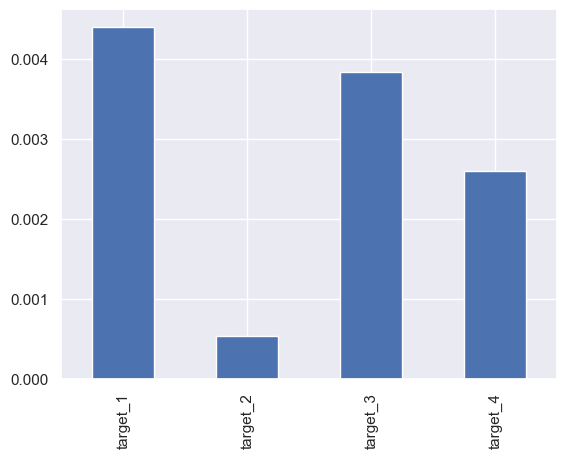

In [456]:
targets[target_columns].mean(axis=0).plot(kind='bar')

[]

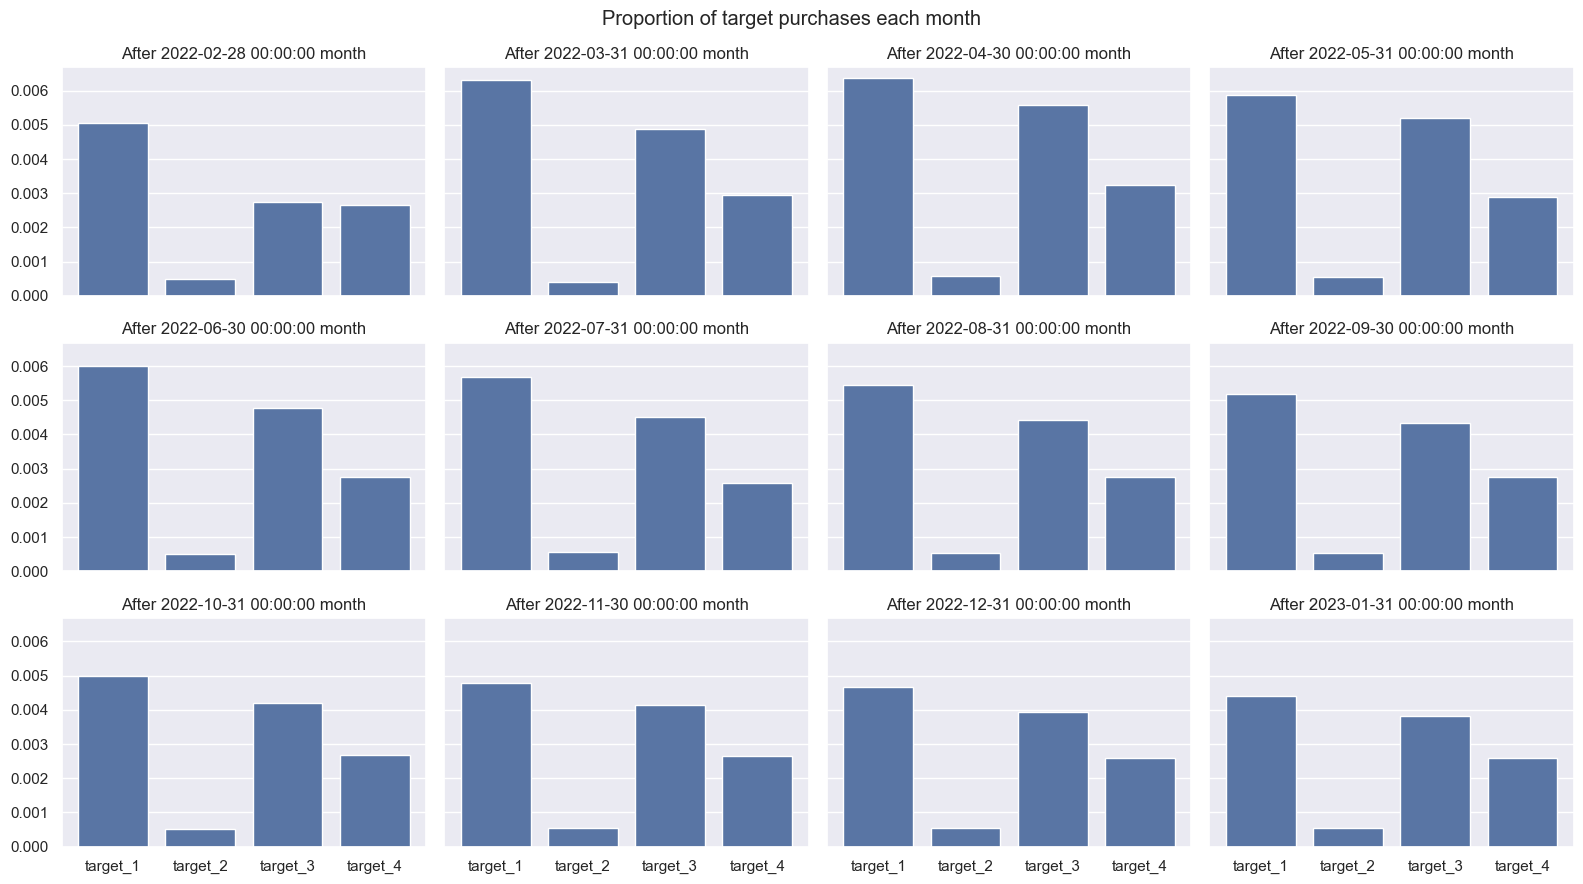

In [457]:
nrows, ncols = 3, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(16, 9), tight_layout=True)

fig.suptitle('Proportion of target purchases each month')
for i, month in enumerate(months):
    ax = axs[i // ncols, i % ncols]
    df = targets[targets['mon'] <= month][target_columns].mean(axis=0)
    sns.barplot(ax=ax, data=df)
    ax.set_title(f'After {month} month')

plt.plot()

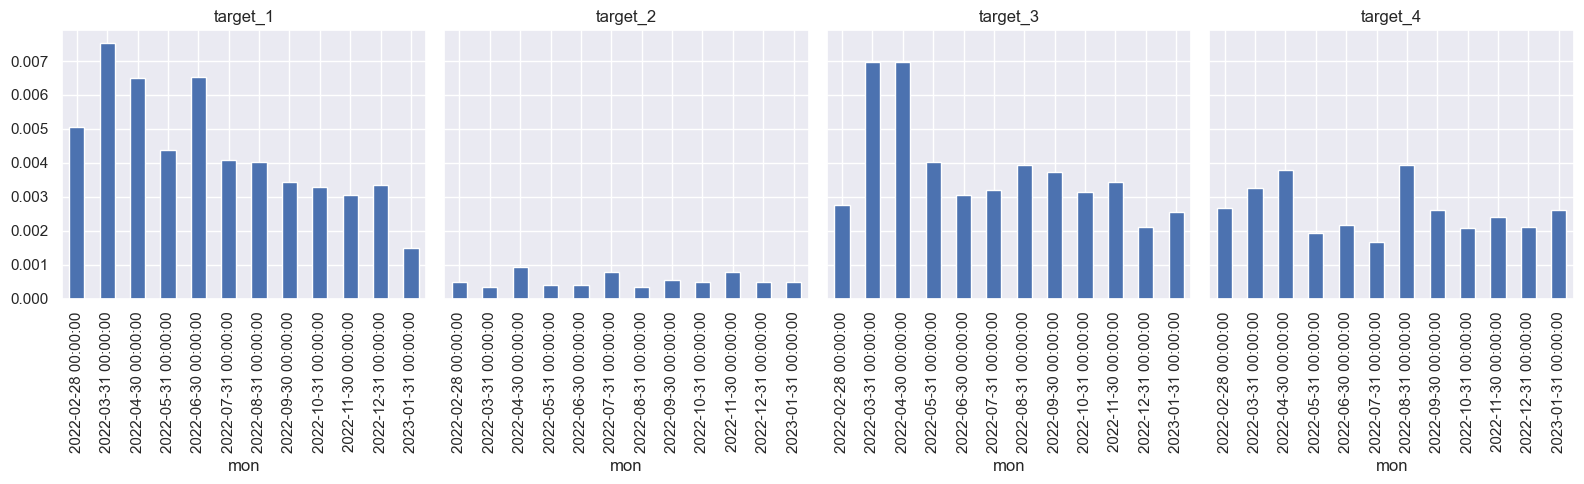

In [458]:
nrows, ncols = 1, 4

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(16, 5), tight_layout=True)

for i in range(nrows):
    for j in range(ncols):
        target_column = f'target_{i * ncols + j + 1}'
        if nrows == 1:
            ax = axs[j]
        else:
            ax = axs[i, j]
        ax.set_title(target_column)
        targets.groupby('mon')[target_column].mean().plot(ax=ax, kind='bar')
plt.show()

In [459]:
targets['target_total'] = targets[target_columns].sum(axis=1)
targets.head()

,client_id,mon,target_1,target_2,target_3,target_4,trans_count,diff_trans_date,target_total
0,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2022-02-28,0,0,0,0,10,0.0,0
1,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2022-03-31,0,0,0,0,29,0.0,0
2,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2022-04-30,0,0,0,0,51,0.0,0
3,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2022-05-31,0,0,0,0,52,4.0,0
4,00bd0ecf3d5a33aa8756097967d07797dca4c98de9b61c...,2022-06-30,0,0,0,0,52,35.0,0


In [460]:
targets['target_total'].value_counts()

target_total
0    241327
1      2452
2       151
3         6
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of sum of targets')

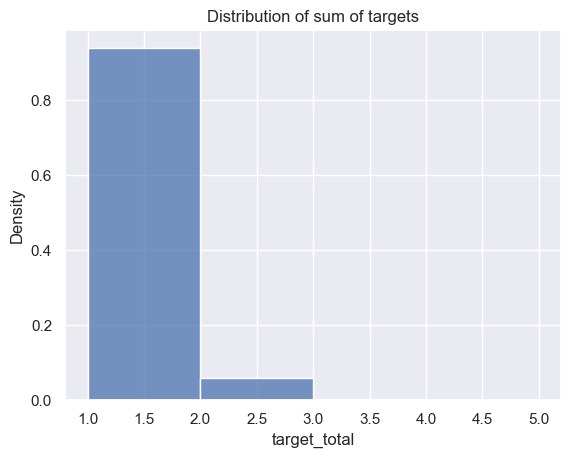

In [461]:
ax = sns.histplot(
    data=targets, 
    x='target_total', 
    stat='density', 
    binrange=(1, 5), 
    bins=4, 
    # log_scale=(False, True), 
)
ax.set_title('Distribution of sum of targets')

In [462]:
targets['trans_count'].describe()

count    243936.000000
mean         95.498758
std         146.156015
min           0.000000
25%           6.000000
50%          33.000000
75%         120.000000
max        1000.000000
Name: trans_count, dtype: float64

Text(0.5, 1.0, 'Distribution of number of transactions')

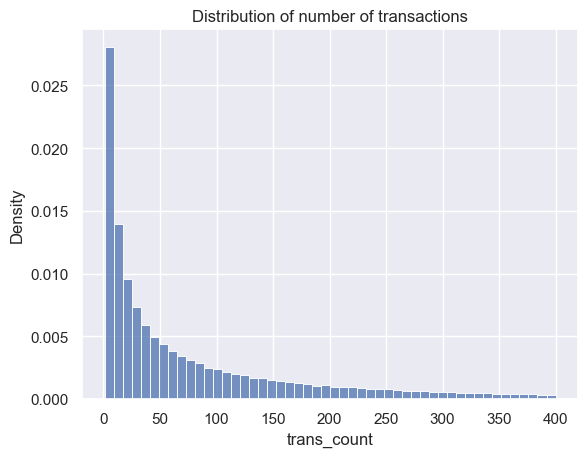

In [463]:
ax = sns.histplot(
    data=targets, 
    x='trans_count', 
    stat='density', 
    binrange=(1, 400), 
    bins=50, 
)
ax.set_title('Distribution of number of transactions')

In [464]:
targets['diff_trans_date'].describe()

d:\SberIndex\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    243936.0
mean          inf
std           NaN
min           0.0
25%           0.0
50%           4.0
75%          24.0
max           inf
Name: diff_trans_date, dtype: float64

Text(0.5, 1.0, 'Distribution of time since last transaction')

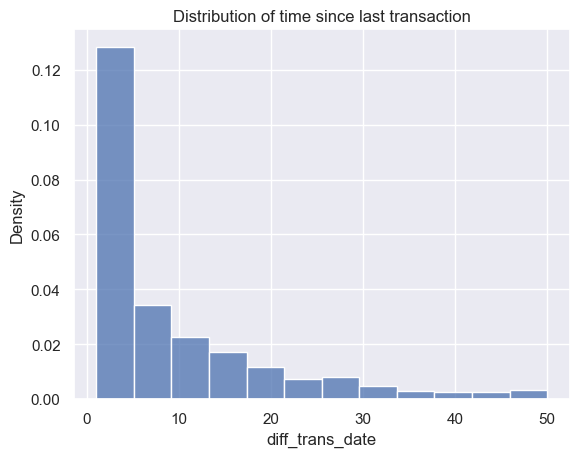

In [465]:
ax = sns.histplot(
    data=targets, 
    x='diff_trans_date', 
    stat='density', 
    binrange=(1, 50), 
    bins=12, 
)
ax.set_title('Distribution of time since last transaction')

[]

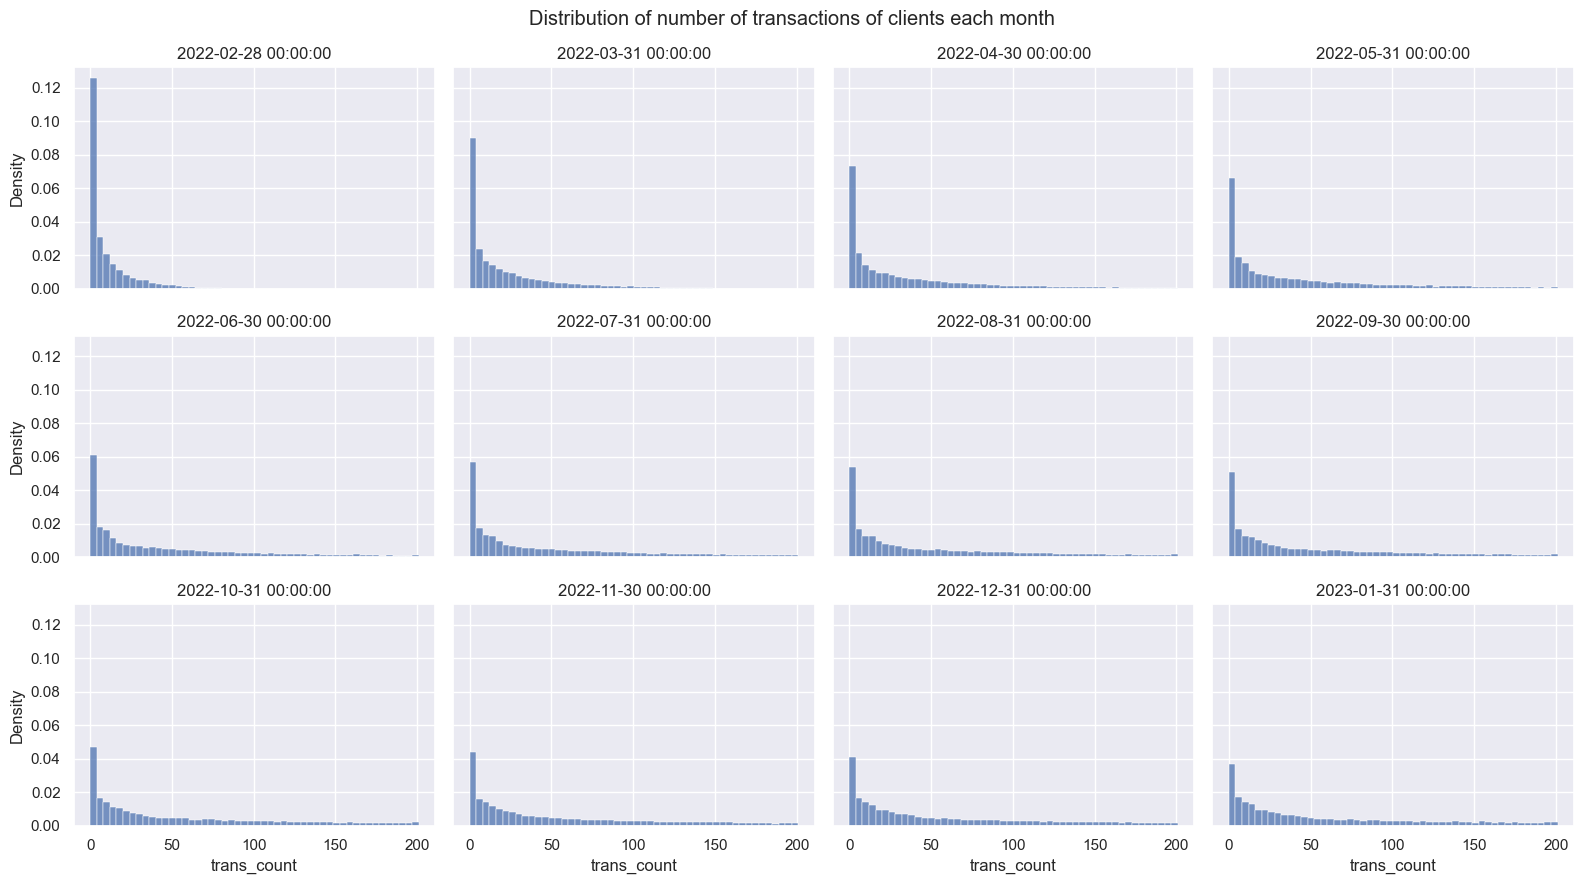

In [466]:
nrows, ncols = 3, 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(16, 9), tight_layout=True)

fig.suptitle('Distribution of number of transactions of clients each month')
for i, month in enumerate(months):
    ax = axs[i // ncols, i % ncols]
    df = targets[targets['mon'] <= month].groupby('client_id')['trans_count'].max()
    sns.histplot(
        ax=ax, 
        data=df, 
        stat='density', 
        binrange=(0, 201), 
        bins=50, 
    )
    ax.set_title(month)

plt.plot()

Although if we look the average number of transactions among all the client per month, we notice a clear linear trend: 

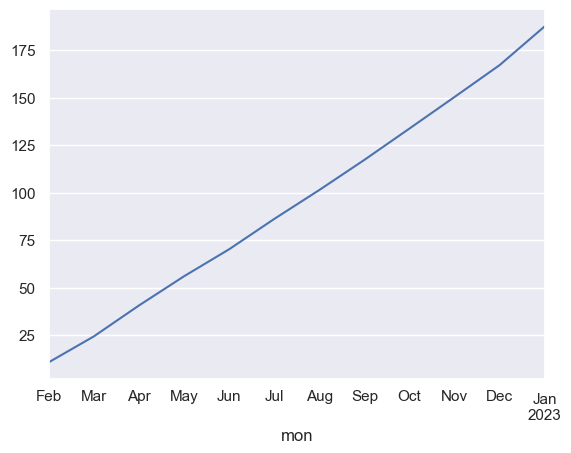

In [467]:
ax = targets.groupby('mon')['trans_count'].mean().plot()

In [468]:
vals = targets.groupby('mon')['trans_count'].mean().values
diff_abs = vals[1:] - vals[:-1]
# diff_rel = np.divide(diff_abs, vals[:-1])
np.mean(diff_abs)

16.06854853135845

Text(0.5, 1.0, 'Absolute difference in number of transactions from month to month')

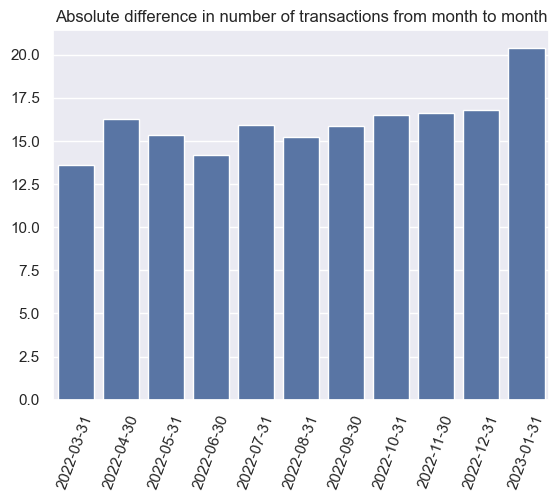

In [469]:
# ax = plt.subplot()
plt.xticks(rotation=70)
ax = sns.barplot(x=months[1:], y=diff_abs)
ax.set_title('Absolute difference in number of transactions from month to month')